# Chapter 14 Iterations and Comprehensions
## Iterations: A First Look
The for loop can work on any sequence type in Python *it works on any **iterable object***. In fact, this is *true of all iteration tools that scan objects from left to right in Python*, including for loops, the list comprehensions, in membership tests, the map built-in function .etc

> An object is **considered iterable if it is either a physically stored sequence, or an object that produces one result at a time in the context of an iteration tool**. In a sense, iterable objects include both physical sequences and virtual se- quences computed on demand.


The terms “iterable” and “iterator” are sometimes used interchangeably to refer to an object that supports iteration in general. Use the term **iterable to refer to an object that supports the iter call**, and **iterator to refer to an object returned by an iterable on iter** that supports the next(I) call.

## The Iteration Protocol: File Iterators 
open file objects have a method called readline, which reads one line of text from a file at a time, *each time we call the readline method, we advance to the next line. At the end of the file, an empty string is returned, which we can detect to break out of the loop*.

`__next()__` it returns the next line from a file each time it is called. The only noticeable difference is that `__next__` raises a built-in StopIteration exception at end-of-file instead of returning an empty string

> This interface is most of what we call the iteration protocol in Python. Any object with a __next__ method to advance to a next result, which raises StopIteration at the end of the series of results, is considered an iterator in Python. Any such object may also be stepped through with a for loop or other iteration tool, because all iteration tools normally work internally by calling __next__ on each iteration and catching the StopIt eration exception to determine when to exit.

This is considered the best way to read text files line by line today, for three reasons: 
- it’s the simplest to code 
- might be the quickest to run 
- is the best in terms of memory usage.

> `readlines` technique still works but is not considered the best practice today and performs poorly in terms of memory usage. In fact, because this version really **does load the entire file into memory all at once, it will not even work for files too big to fit into the memory space available on your computer**. By contrast, because it reads one line at a time, the iterator-based version is immune to such memory-explosion issues. 

*iterators run at C language speed inside Python, whereas the while loop version* **runs Python byte code through the Python virtual machine**



In [50]:
open(os.path.join(os.getcwd(),'text')).__next__()

'Lorem ipsum dolor sit amet, consectetur adipiscing elit. In laoreet porttitor sapien quis ullamcorper. In hac habitasse platea dictumst. Proin fringilla felis massa, ut porttitor libero volutpat vel. Pellentesque ac justo lectus. Donec lacinia ipsum congue purus convallis, nec venenatis est faucibus. Duis aliquet volutpat semper. Donec fermentum in ligula a lacinia. Morbi nec leo at nulla cursus hendrerit.\n'

To simplify manual iteration built-in function, `next`, that *automatically calls an object’s `__next__` method*.

When the for loop begins, it first obtains an iterator from the iterable object by passing it to the iter built-in function; the object returned by iter in turn has the required next method. The iter function internally runs the __iter__ method, much like next and __next__.

### The full iteration protocol
- The iterable object you request iteration for, whose __iter__ is run by iter
- The iterator object returned by the iterable that actually produces values during the iteration, whose __next__ is run by next and raises StopIteration when finished producing results.

some objects are both an iteration context tool (they iterate) and an iterable object (their results are iterable).


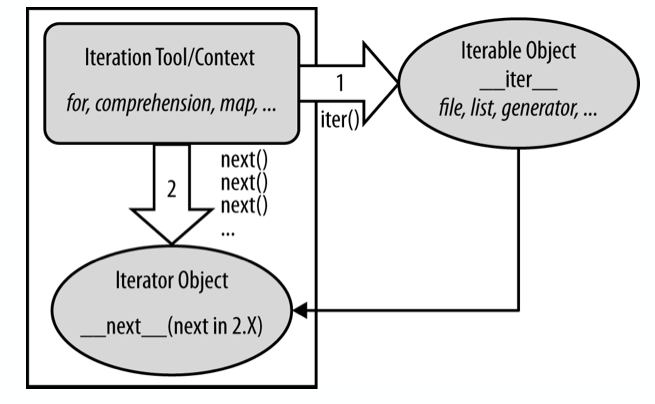

Initial step is not required for files, because a file object is its own iterator. Because they support just one iteration (they can’t seek backward to support multiple active scans), files have their own __next__ method and do not need to return a different object that does.

Lists and many other built-in objects, though, are not their own iterators because they do support multiple open iterations

In [51]:
fd = open(os.path.join(os.getcwd(),'text'))
for x in fd:
    print(x)
    for y in fd:
        print(y)
        
l = list(range(3))
for x in l:
    print(x)
    for y in l:
        print(y)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. In laoreet porttitor sapien quis ullamcorper. In hac habitasse platea dictumst. Proin fringilla felis massa, ut porttitor libero volutpat vel. Pellentesque ac justo lectus. Donec lacinia ipsum congue purus convallis, nec venenatis est faucibus. Duis aliquet volutpat semper. Donec fermentum in ligula a lacinia. Morbi nec leo at nulla cursus hendrerit.



Proin mattis massa vitae lacus scelerisque vulputate. Integer venenatis euismod magna ut placerat. Ut ac nunc a lorem posuere vulputate. Curabitur eu neque sapien. Nam ac ex molestie eros eleifend faucibus. Vivamus non placerat urna. Quisque ultrices, lectus ut lacinia viverra, diam purus dictum metus, at dignissim dolor ante lobortis massa. Aliquam lectus nulla, euismod at sapien at, pharetra tempor velit. Donec cursus libero ut varius gravida. Etiam et luctus leo, eu iaculis nunc.



Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Pell

### Manual Iteration
Python iteration tools call these functions automatically, we can use them to apply the iteration protocol manually

In [52]:
for x in l: # Automatic Iteration
    print(x)
    
I = iter(l) # Manual iteration: what for loops usually do 
while True:
    try :
        x = next(I)
    except StopIteration:
        break
    print(x)

0
1
2
0
1
2


### Other Built-in Type Iterables 
The **classic way to step through the keys of a dictionary**, for example, is to **request its keys list explicitly**. 

Dictionaries are iterables with an iterator that automatically returns one key at a time in an iteration context.The net effect is that we no longer need to call the keys method to step through dic- tionary keys—the for loop will use the iteration protocol to grab one key each time 

The iteration protocol also is the reason that we’ve had to wrap some results in a list call to see their values all at once. Objects that are iterable return results one at a time, not in a physical list.

In fact, everything that scans left to right in Python employs the iteration protocol in the same way.

## List Comprehensions: A First Detailed Look
use range to change a list as we step across it:

In [53]:
for i in range(len(l)):
    l[i] = 3
print(l)

[3, 3, 3]


the list comprehension expression makes many such prior coding patterns obsolete. The net result is similar, but it requires less coding on our part and is likely to run substantially faster. 

### List Comprehension Basics 
List comprehensions are *written in square brackets because they are ultimately a way to construct a new list*. They **begin with an arbitrary expression** that we make up, which uses **a loop variable** that we make up. That is followed by the header of a for loop, which names the loop variable, and an iterable object.

Python executes an iteration across L inside the interpreter, assigning x to each item in turn, and collects the results of running the items through the expression on the left side.

list comprehensions are never really required because we can always build up a list of expression results manually with for loops that append results as we go. In fact, this is exactly what the list comprehension does internally. 

* list comprehensions might run much faster than manual for loop statements (often roughly twice as fast) because their iterations are performed at C language speed inside the interpreter, rather than with manual Python code.*

### Using List Comprehensions on Files 

the file object has a readlines method that loads the file into a list of line strings all at once.

Anytime we start thinking about performing an operation on each item in a sequence, we’re in the realm of list comprehensions.

the method chaining in the second of these examples works because string methods return a new string, to which we can apply another string method.

we can also collect multiple results, as long as they’re wrapped in a collection like a tuple or list.

### Extended List Comprehension Syntax 
#### Filter clauses: if 
 the for loop nested in a comprehension expression can have an associated if clause to filter out of the result items for which the test is not true. 
 
#### Nested loops: for 
they may contain nested loops, coded as a series of for clauses. In fact, their full syntax allows for any number of for clauses, each of which can have an optional associated if clause. 

#### Other Iteration Contexts
*every built-in tool that scans from left to right across objects uses the iteration protocol. *

`Map` it’s a built-in that applies a function call to each item in the passed-in iterable object. map is similar to a list comprehension but is more limited because it requires a function instead of an arbitrary expression. It also returns an iterable object itself in Python 3.X, so we must wrap it in a list call to force it to give us all its values at once.

`sorted` sorts items in an iterable; `zip` combines items from iterables; `enumerate` pairs items in an iterable with relative positions; filter selects items for which a function is true; and reduce runs pairs of items in an iterable through a function.

`sorted` is a built-in that employs the iteration protocol—it’s like the orig- inal list sort method, but it returns the new sorted list as a result and runs on any iterable object. Notice that, unlike map and others, sorted returns an actual list in Python 3.X instead of an iterable. 

 sequence assignment, the in membership test, slice assignment, and the list’s extend method also leverage the iteration protocol to scan, and thus read a file by lines automatically.
 
`extend` iterates automatically, but `append` does not—use the latter (or similar) to add an iterable to a list without iterating, with the potential to be iterated across later.

both set and dictionary comprehensions support the extended syntax of list comprehensions.

 the sum call computes the sum of all the numbers in any iterable; the any and all built-ins return True if any or all items in an iterable are True, respectively; and max and min return the largest and smallest item in an iterable, respectively.

## New Iterables in Python 3.X
### The range Iterable 
it returns an iterable that generates numbers in the range on demand, instead of building the result list in memory. range objects in 3.X support only iteration, indexing, and the len function. 
### The map, zip, and filter Iterables 
Like range, the map, zip, and filter built-ins also become iterables in 3.X to conserve space, rather than producing a result list all at once in memory.

The zip built-in, introduced in the prior chapter, is an iteration context itself, but also returns an iterable with an iterator that works the same way

### Multiple Versus Single Pass Iterators 
 the range object differs from the built-ins described in this section—it supports len and indexing, it is not its own iterator (you make one with iter when iterating manually), and it supports multiple iterators over its result that remember their positions independently
 
 By contrast, in 3.X zip, map, and filter do not support multiple active iterators on the same result; because of this the iter call is optional for stepping through such objects’ results—their iter is themselves.
 
### Dictionary View Iterables 
 in Python 3.X the dictionary keys, values, and items methods return iterable view objects that generate result items one at a time, instead of producing result lists all at once in memory.
 
 View objects are iterables, which simply means objects that generate result items one at a time, instead of producing the result list all at once in memory. Besides being iterable, dictionary views also retain the original order of dictionary components, reflect future changes to the dictionary, and may support set operations. On the other hand, because they are not lists, they do not directly support operations like indexing or the list sort method, and do not display their items as a normal list when printed

In [54]:
len(range(3))

3